In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

sys.path.append('..')

from utils.dataset import DatasetReader

# Visualizing dataset 1

In [3]:
dr = DatasetReader(dataset=1, dataset_path='../temp/PUC_DIR')

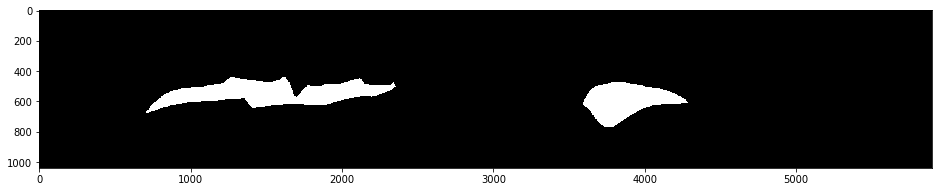

In [4]:
plt.imshow(dr.mask, cmap='gray')

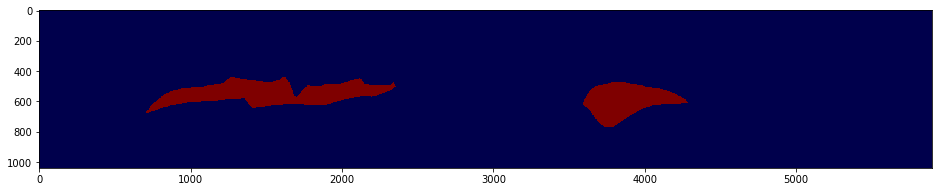

In [5]:
plt.imshow(dr.mask, cmap='seismic')

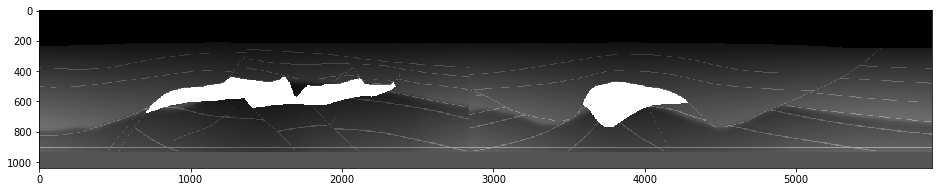

In [6]:
plt.imshow(dr.vel, cmap='gray')

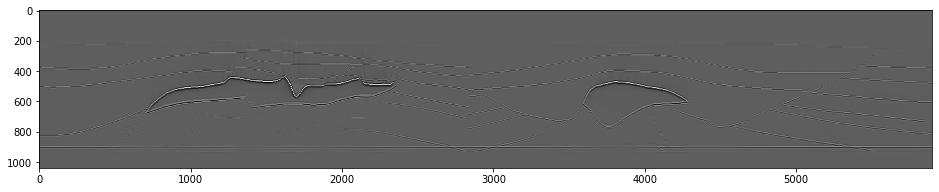

In [7]:
plt.imshow(dr.well, cmap='gray')

# Visualizing dataset 2

In [8]:
dr = DatasetReader(dataset=2, dataset_path='../temp/PUC_DIR')

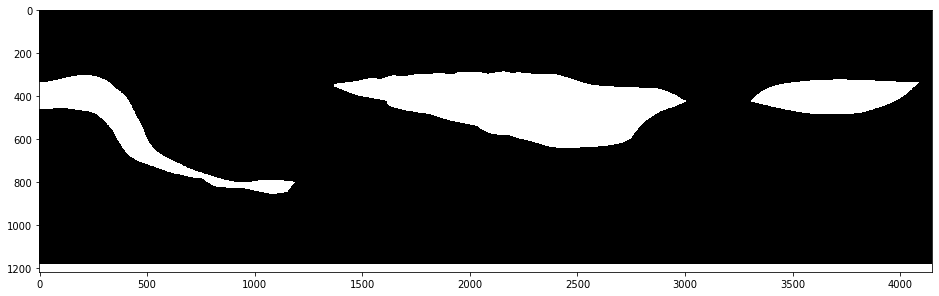

In [9]:
plt.imshow(dr.mask, cmap='gray')

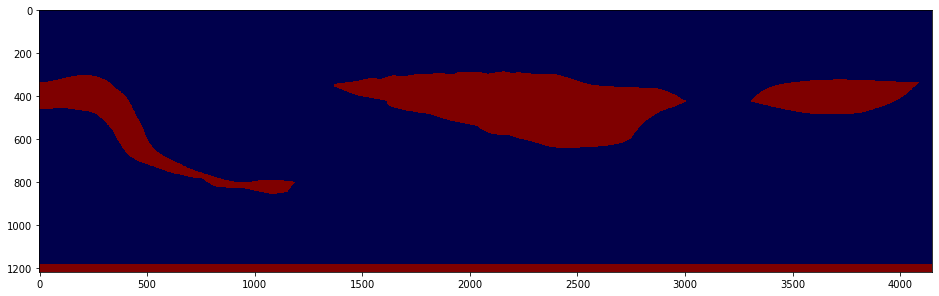

In [10]:
plt.imshow(dr.mask, cmap='seismic')

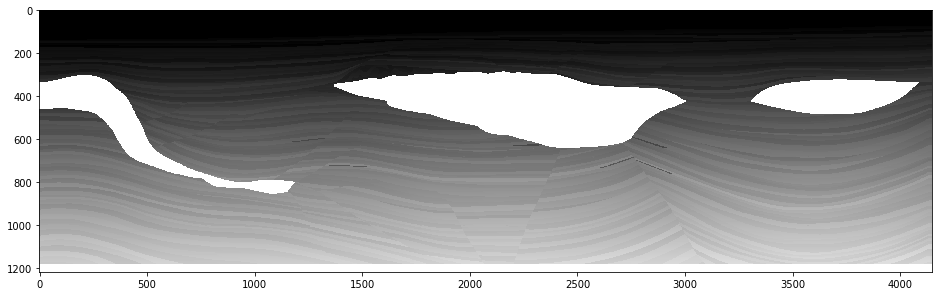

In [11]:
plt.imshow(dr.vel, cmap='gray')

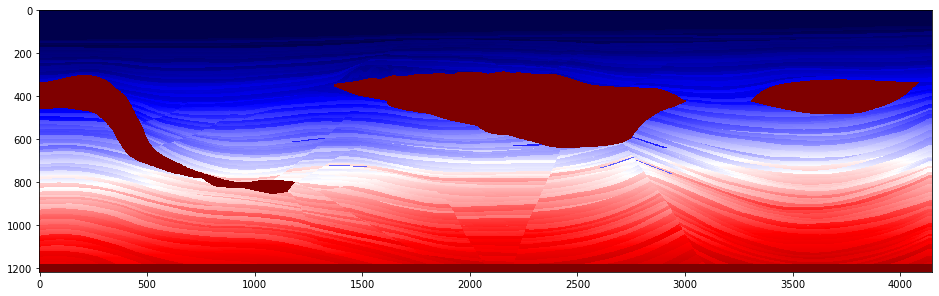

In [12]:
plt.imshow(dr.vel, cmap='seismic')

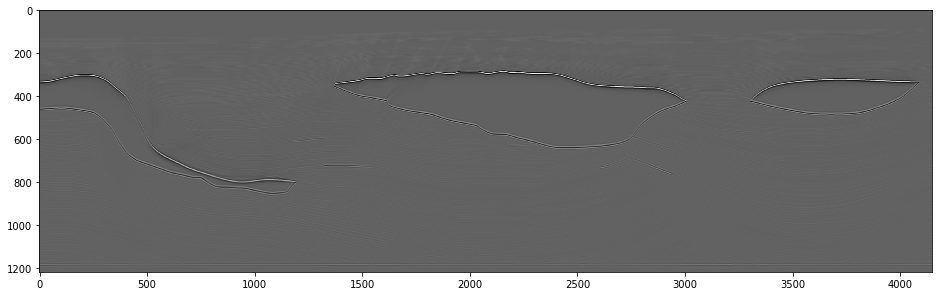

In [13]:
plt.imshow(dr.well, cmap='gray')

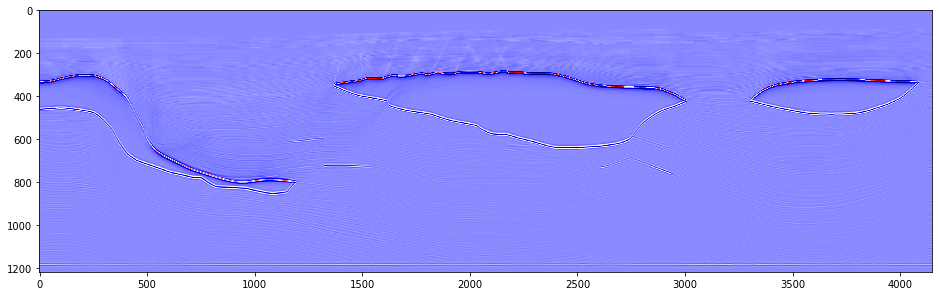

In [14]:
plt.imshow(dr.well, cmap='seismic')

# Break into 64x64 imgs

In [106]:
dr = DatasetReader(dataset=1, dataset_path='../temp/PUC_DIR')

In [107]:
dr.well.shape[0]/64, dr.well.shape[1]/64

(16.25, 92.1875)

In [108]:
shape = (64*(dr.well.shape[0]//64), 64*(dr.well.shape[1]//64))
shape

(1024, 5888)

In [109]:
data_coord = [(64*i, 64*j) for i in range(shape[0]//64) for j in range(shape[1]//64)]
len(data_coord), data_coord[-1]

(1472, (960, 5824))

# Sample data from coord

In [88]:
sample = 982

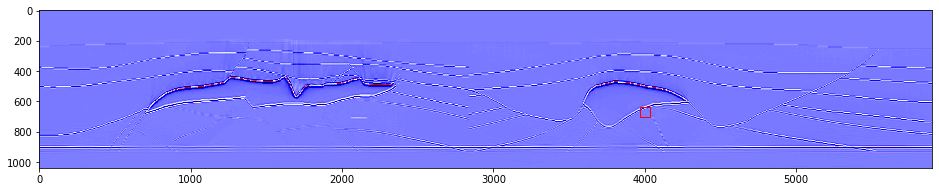

In [89]:
fig,ax = plt.subplots(1)
ax.imshow(dr.well, cmap='seismic')

rect = patches.Rectangle([data_coord[sample][1], data_coord[sample][0]], 
                         64, 64, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()

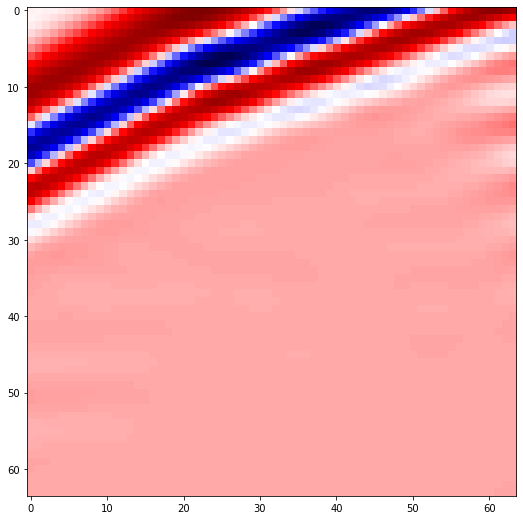

In [110]:
plt.imshow(dr.well[data_coord[sample][0] : data_coord[sample][0]+64, 
                   data_coord[sample][1] : data_coord[sample][1]+64], cmap='seismic')

In [112]:
dataset = [dr.well[coord[0]: coord[0] + 64, coord[1]: coord[1] + 64] for coord in data_coord]
len(dataset)

1472

In [126]:
dr = DatasetReader(dataset=2, dataset_path='../temp/PUC_DIR')
shape = (64*(dr.well.shape[0]//64), 64*(dr.well.shape[1]//64))
data_coord = [(64*i, 64*j) for i in range(shape[0]//64) for j in range(shape[1]//64)]

dataset2 = [dr.well[coord[0]: coord[0] + 64, coord[1]: coord[1] + 64] for coord in data_coord]
len(dataset2)

1216

# Downsampling image

In [28]:
from skimage.transform import rescale, resize, downscale_local_mean

In [113]:
image = dataset[sample]

In [114]:
image_down = downscale_local_mean(image, (2, 2))

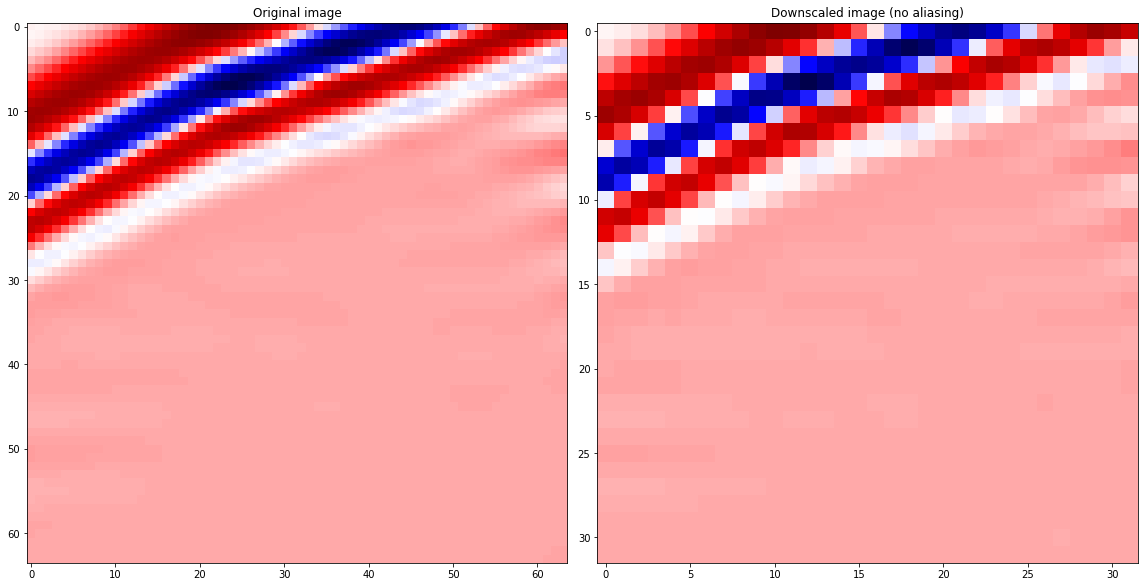

In [115]:
fig, axes = plt.subplots(ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='seismic')
ax[0].set_title("Original image")

ax[1].imshow(image_down, cmap='seismic')
ax[1].set_title("Downscaled image (no aliasing)")

plt.tight_layout()
plt.show()

# Dataset Anlysis

### Check percentage of the dataset that all pixels have the same value

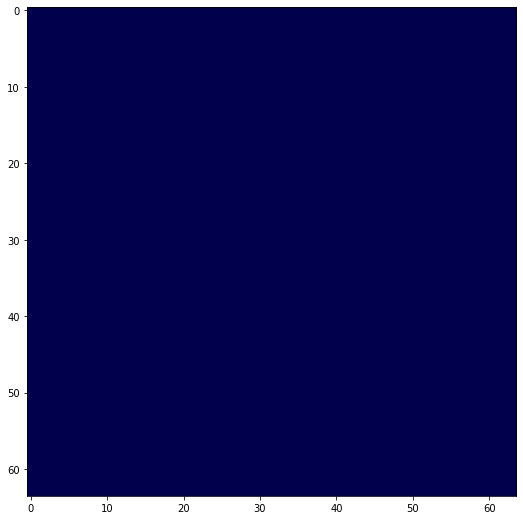

In [124]:
plt.imshow(dataset[0], cmap='seismic')

In [122]:
same = 0

for data in dataset:
    if data.std() == 0:
        same +=1
        
print(f"{same} images = {round(100*same/len(dataset), 2)}%")

268 images = 18.21%


In [127]:
same = 0

for data in dataset2:
    if data.std() == 0:
        same +=1
        
print(f"{same} images dataset2 = {round(100*same/len(dataset2), 2)}%")

70 images dataset2 = 5.76%


### Check max std

0.25886586


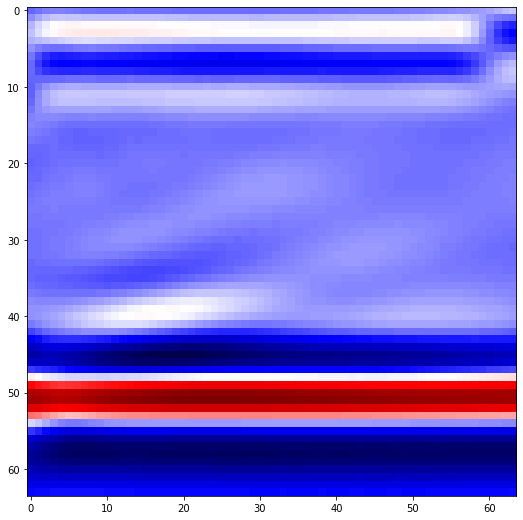

In [157]:
std = []

for data in dataset:
    std.append(data.std())

print(max(std))
plt.imshow(dataset[std.index(max(std))], cmap='seismic')

0.2208558


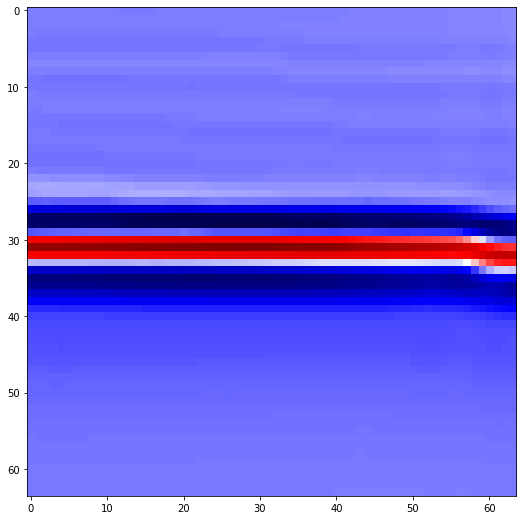

In [156]:
std2 = []

for data in dataset2:
    std2.append(data.std())

print(max(std2))
plt.imshow(dataset2[std2.index(max(std2))], cmap='seismic')

### Check mean STD

0.027857542


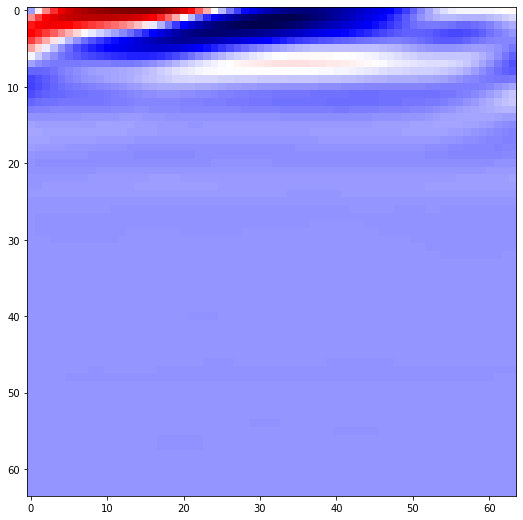

In [155]:
print(np.mean(std))

for i in std:
    if abs(i - np.mean(std)) < 0.0002:
        plt.imshow(dataset[std.index(i)], cmap='seismic')
        break

0.01983811


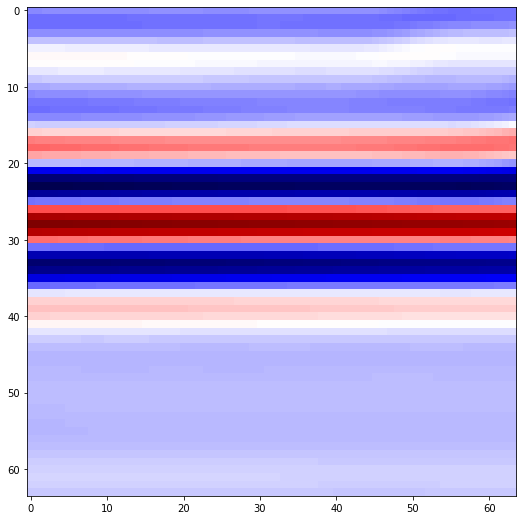

In [161]:
print(np.mean(std2))

for i in std2:
    if abs(i - np.mean(std2)) < 0.0001:
        plt.imshow(dataset2[std2.index(i)], cmap='seismic')
        break